<a href="https://colab.research.google.com/github/whatnews72/----/blob/master/03_%EB%8B%A4%EC%9D%B4%EC%95%84%EB%AA%AC%EB%93%9C_%EA%B0%80%EA%B2%A9%EC%9D%84_%EC%98%88%EC%B8%A1%ED%95%98%EB%8B%A4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **다이아몬드 가격을 예측하다**

---

다층 퍼셉트론을 이용하여 다이아몬드 가격을 예측하는 인공지능 모델을 만들어 봅
니다.

> ### 1. 문제정의  
  - 다이아몬드 가격 예측  

> ### 2. 데이터 불러오기  
  - 다이아몬드 데이터 셋  

> ### 3. 데이터 탐색 및 전처리하기  
  - 정규화 : 속성별 미치는 영향을 공평하게(범주형 수치형 변환)
  - 데이터 나누기 : 훈련+테스트  

> ### 4. 모델 생성하기  
  - 인공 신경망 생성  

> ### 5. 모델 컴파일하기  

> ### 6. 모델 학습하기  

> ### 7. 모델 평가 및 예측하기

### **1. 라이브러리 불러오기**

In [ ]:
import pandas as pd
import seaborn as sns # 다이아몬드 데이터 로드 라이브러리
from sklearn.preprocessing import MinMaxScaler # 정규화 라이브러리
from sklearn.model_selection import train_test_split # 데이터 분리 라이브러리
from tensorflow import keras # 신경망 모델 생성
from sklearn.metrics import r2_score # 결정계수 산출
import matplotlib.pyplot as plt # 그래프 그리기

### **2. 데이터 불러오기**  
---  
#### **데이터 셋 객체 = 시본 라이브러리.load_dataset('데이터 셋명')**  
---

kaggle.com의 https://www.kaggle.com/datasets/shivam2503/diamonds 을 통해서도 다이아몬드 데이터 셋을 가져올 수 있습니다.

In [ ]:
# 데이터 불러오기
df = sns.load_dataset('diamonds')
#sns.get_dataset_names()    #시본 라이브러리 데이터 셋 목록

### **3. 데이터 정보 확인하기**

---  
#### **데이터프레임 객체.info( )**  
---  
info( ) 메소드를 통해 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 타입 등 확인

In [ ]:
# 데이터 정보 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### **4. 데이터 살펴보기**
---
#### **데이터프레임 객체.head(확인할 데이터 개수)**
---
head( ) 메소드를 통해 데이터 상단의 일부 데이터 확인  
head( )의 괄호 안에 숫자를 입력하지 않으면 기본값인 5로 설정되어 0~4행의 데이터가 출력

In [ ]:
# 상위 5개 데이터 살펴보기
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### **5. 데이터 통계치 살펴보기**  
---
#### **데이터프레임 객체.describe()**  
---
describe( ) 메소드를 통해 데이터 개수, 평균, 표준편차, 최솟값, 최댓값, 4분위수 파악  
속성값만 출력. 결측치 제외

In [ ]:
# 데이터 통계치 살펴보기
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### **6. 수치형 데이터로 변환**  

#### 원-핫 인코딩

---  

#### **판다스 객체.get_dummies(데이터프레임 객체, columns = [인코딩할 속성명])**  
---  
특정 속성만 원-핫 인코딩을 할 때는 columns에 속성명 제시**  


In [ ]:
# 원-핫 인코딩하기
df = pd.get_dummies(df)
df

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,True,False,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,False,False,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,True,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,True,False,...,False,False,False,False,False,False,False,False,True,False


### **7. 독립 변수와 종속 변수**  

* 독립변수 : 영향을 미치는 속성
* 종속변수 : 독립변수의 영향을 받는 속성

> 독립변수 : 무게(carat), 커팅 품질(cut), 색상(color), 투명도(clarity), 테이블(table)  
종속변수 : 가격(price)  

---  
#### **데이터프레임 개체.iloc[범위]**
#### **판다스 객체.concat([데이터프레임명, 데이터프레임명], axis = 0 / 1)**  

---  
axis = 0이면 행 방향(아래)으로 합침.(기본값), axis = 1이면 열 방향(오른쪽)으로 합침.


In [ ]:
# 독립 변수(X)와 종속 변수(Y) 설정하기
X1 = df.iloc[:, 0:3]  #0~2번 열 추출
X2 = df.iloc[:, 4:]   #4번열 이후 모두 추출

X = pd.concat([X1, X2], axis = 1)
Y = df.iloc[:, 3]     #모든 행의 3번째 속성 선택

In [ ]:
pd.set_option('display.max_columns', None)
X

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


### **8. 독립변수 정규화**

---  
#### **정규화 객체 = MinMaxScaler( )**  
#### **정규화 객체.fit_transform(정규화할 데이터프레임명)**  

---  
MinMaxScaler( )로 정규화 객체를 만든 후에 속성값의 범위를 실숫값
인 0.0~1.0 사이로 변환하는 작업을 위하여 fit_transform( ) 메소드를 사용

In [ ]:
# 데이터 정규화하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00623701, 0.51388889, 0.23076923, ..., 0.        , 1.        ,
        0.        ],
       [0.002079  , 0.46666667, 0.34615385, ..., 1.        , 0.        ,
        0.        ],
       [0.00623701, 0.38611111, 0.42307692, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1039501 , 0.55      , 0.32692308, ..., 1.        , 0.        ,
        0.        ],
       [0.13721414, 0.5       , 0.28846154, ..., 0.        , 1.        ,
        0.        ],
       [0.11434511, 0.53333333, 0.23076923, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
 pd.concat([pd.DataFrame(X_scaled), Y], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,price
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,326
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,326
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,327
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,334
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2757
53936,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2757
53937,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2757
53938,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2757


### **9. 훈련 데이터와 테스트 데이터 나누기**  

사이킷런(scikit-learn)의 model_selection 모듈에서 train_test_split 사용  

---
#### **학습에 사용할 독립 변수 객체, 테스트에 사용할 독립 변수 객체, 학습에 사용할 종속 변수 객체, 테스트에 사용할 종속 변수 객체 = train_test_split (독립 변수, 종속 변수, test_size = 테스트 데이터 비율)**
---
독립 변수: 영향을 미치는 속성  
종속 변수: 영향을 받는 속성  
테스트 데이터 비율: 실수 형태로 나타내며, 예를 들어 0.3을 입력한다면
전체 데이터의 30%를 테스트 데이터로 배정하겠다는 의미, test_size를 생략하면 기본 값 0.25로 설정  

*train_test_split*( )은 실행될 때마다 데이터를 매번 임의로 하여 훈련 데이터와 테스트 데이터를 새롭게 구성

![train_test_split](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2022/05/train-test-split_simple-visual-example_v2.png)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분리하기
train_input, test_input, train_target, test_target = train_test_split(
    X_scaled, Y, test_size = 0.3)

# 데이터 셋의 형태 확인하기
train_input.shape, train_target.shape, test_input.shape, test_target.shape


((37758, 26), (37758,), (16182, 26), (16182,))

### **10. 모델 생성하기**

---
#### **모델 객체 = keras.Sequential( )**  
#### **모델 객체.add(keras.layers.Dense(은닉층 노드의 개수, activation = '활성화 함수명',input_shape = (입력층 행의 개수, )))**
#### **모델 객체.add(keras.layers.Dense(출력층 노드의 개수, activation = '활성화 함수명')])**  

---
keras.layers.Dense( )는 층을 만드는 명령, add는 모델에 층을 추가하는 명령


In [ ]:
# 인공 신경망 모델 생성하기
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_shape = (26, )))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1))
model.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3456      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 52993 (207.00 KB)
Trainable params: 52993 (207.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **11. 모델 컴파일 및 학습하기**  

* 손실 함수(Loss Function) : 예측값과 실젯값(레이블)의 차이 계산. MSE, MAE
* 최적화 함수(Optimizer Function) : 손실 함수의 값을 최소화하도록 가중치와 바이어스 값 조정. Adam, SDG, Grandient Descent

---
* MSE(Mean Sqared Error): 예측값과 실젯값의 차이를 제곱한 후 전부 더하여 평균을 낸 것  
![MSE](https://velog.velcdn.com/images%2Fyuns_u%2Fpost%2F85175e99-d290-4571-962b-cc63ada6b5e1%2Fimage.png)
* MAE(Mean Absolute Error): 오차의 절대값을 모두 더하여 평균낸 것  
![MAE](https://mblogthumb-phinf.pstatic.net/MjAxOTAyMTJfMTYw/MDAxNTQ5OTMwOTMyOTcw.GixPuXrWBQ1KnQj92SQGg3YFXhASvxJH2aZ4_ZMJtl8g.pDG6xO3mlTmDJIzXyCte3g14QjnIY-7-Gnya05rR1XYg.PNG.doublet7411/SE-f51eee5b-e2b4-4868-b740-66d081b04167.png?type=w800)  

---  
#### **모델 객체.compile(loss = '손실 함수명', optimizer = '최적화 함수명', metrics = ['평가 지표명'])**  

모델 컴파일하기  

---  
#### **모델 객체.fit(훈련 데이터, 훈련 데이터의 레이블, epochs = 반복 학습 횟수)**  
모델 학습하기  

---

In [ ]:
# 모델 컴파일하기 (손실 함수, 최적화, 평가 지표 설정)
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

# 모델 학습하기
history = model.fit(train_input, train_target, epochs = 5)
history

Epoch 1/5
1180/1180 [==============================] - 8s 4ms/step - loss: 7518100.5000 - mae: 1669.4907
Epoch 2/5
1180/1180 [==============================] - 4s 3ms/step - loss: 536932.6250 - mae: 395.7204
Epoch 3/5
1180/1180 [==============================] - 4s 3ms/step - loss: 474496.7188 - mae: 366.2679
Epoch 4/5
1180/1180 [==============================] - 4s 4ms/step - loss: 450955.1250 - mae: 356.3677
Epoch 5/5
1180/1180 [==============================] - 4s 3ms/step - loss: 434428.9375 - mae: 347.8878


### **12. 모델 예측 및 평가하기**  

---
#### **모델 객체.evaluate(테스트 데이터, 테스트 데이터의 레이블)**  
---  
#### **r2_score(실젯값, 예측값)**  
예측값이 실젯값과 얼마나 일치하는지 확인  

---

In [ ]:
# 모델 평가하기
test_loss_score, test_mae_score = model.evaluate(test_input, test_target)

# 결정계수 확인하기
r2 = r2_score(test_target, model.predict(test_input))
print(r2)

506/506 [==============================] - 1s 1ms/step
0.972629033326948


### **13. 실젯값과 예측값 비교 그래프**

---  
#### **맷플롯립 객체.scatter(x축 값, y축 값)**  
---  



506/506 [==============================] - 1s 1ms/step


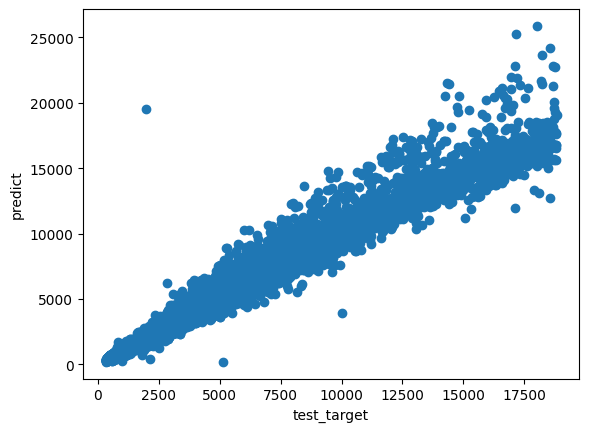

In [ ]:
import matplotlib.pyplot as plt

# 실젯값과 예측값 비교 그래프 그리기
plt.scatter(test_target, model.predict(test_input))
plt.xlabel('test_target')
plt.ylabel('predict')
plt.show()

#### **13. 평균절대오차 그래프**  
회귀 모델이 반복하여 학습(epochs)할 때마다 오차값이 어떻게 변했는지 확인합니다.

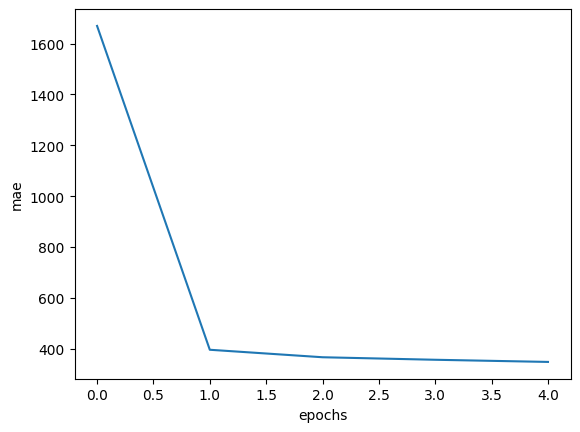

In [ ]:
# epochs에 따른 손실 함수 값 그래프 그리기
plt.plot(history.history['mae'])
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()

확인문제 332쪽

In [ ]:
import numpy as np
# carat: 0.42,	cut:'Very Good', color: 'E',	clarity:'SI2',	depth:57.2,	table:55,	x:4.33,	y:4.35,	z:2])

# 가격을 예측할 새로운 데이터의 범주형 데이터(cut, color, clarity)를 원핫 인코딩
dic = {'carat': [0.42], 'depth': [57.2], 'table': [55],   #수치형 데이터
       'x': [4.33], 'y': [4.35], 'z': [2],
       'cut_Ideal': [0], 'cut_Premium':[0], 'cut_Very Good':[1],    #cut
       'cut_Good':[0], 'cut_Fair':[0],
       'color_D':[0], 'color_E':[1], 'color_F':[0], 'color_G':[0],  #color
       'color_H':[0], 'color_I':[0], 'color_J':[0],
       'clarity_IF':[0], 'clarity_VVS1':[0],                        #clarity
       'clarity_VVS2':[0], 'clarity_VS1':[0],
       'clarity_VS2':[0], 'clarity_SI1':[0],
       'clarity_SI2':[1], 'clarity_I1':[0]}
new_df = pd.DataFrame(dic)
new_scaled = scaler.transform(new_df)  #정규화

predicted = model.predict(new_scaled)  #모델 예측
predicted

1/1 [==============================] - 0s 17ms/step


array([[422.7347]], dtype=float32)